In [28]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lempel_ziv_complexity import lempel_ziv_complexity as lz

## Read MIDI files into binary strings

 - 450 songs
 - majority of songs have around 1400 characters, all songs in the range of 1000 and 1800

In [3]:
midis = []
for f in os.listdir("combined"):
    with open(f"combined/{f}", "rb") as handle:
        midi = handle.read()
        midis.append(midi)

(array([  4.,  26.,  43.,  62., 119., 104.,  42.,  30.,  16.,   4.]),
 array([ 982. , 1068.4, 1154.8, 1241.2, 1327.6, 1414. , 1500.4, 1586.8,
        1673.2, 1759.6, 1846. ]),
 <BarContainer object of 10 artists>)

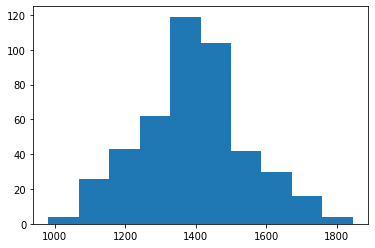

In [15]:
lengths = list(map(len, midis))
plt.hist(lengths)

# Apply Lempel-Ziv Complexity Measurement 

 - unsing the package `lempel-ziv-complexity` which references https://en.wikipedia.org/wiki/Lempel-Ziv_complexity
 - the lz-complexity values are heavily correlated with length (was to be expected), so use normalised complexity 
 - instead of `len()` should actually use `sys.getsizeof()` for the object's byte-size (length in bytes), but the two are strongly correlated, so results are highly similar

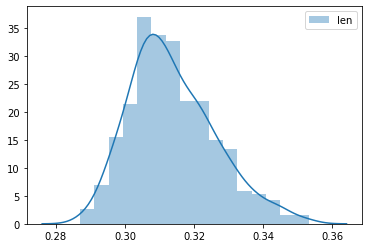

In [37]:
lz_complexities = list(map(lz, midis))
normed_lz_complexities = [c/l for c, l in zip(complexities, lengths)]
sns.distplot(normed_lz_complexities, label="len")
plt.legend()

# Apply LZMA

In [23]:
import lzma

In [50]:
lzma_complexities = [len(lzma.compress(m))/len(m) for m in midis]

<AxesSubplot:>

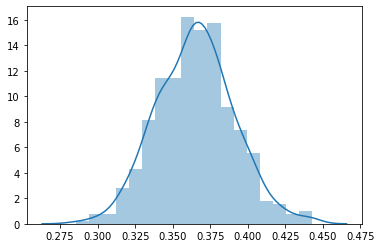

In [51]:
sns.distplot(lzma_complexities)

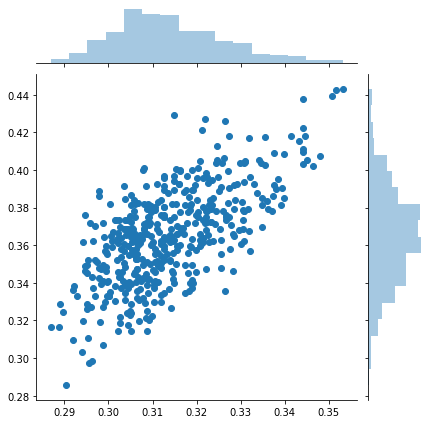

In [68]:
sns.jointplot(normed_lz_complexities, lzma_complexities)

In [75]:
f = np.argmin
f(normed_lz_complexities), f(lzma_complexities),\
f([c1*c2 for c1, c2 in zip(normed_lz_complexities, lzma_complexities)])

(196, 434, 434)

<AxesSubplot:>

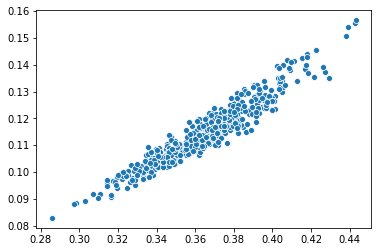

In [62]:
sns.scatterplot(lzma_complexities, [c1*c2 for c1, c2 in zip(normed_lz_complexities, lzma_complexities)])

In [84]:
os.listdir("combined")[266]

'combined_392.mid'

In [86]:
np.argsort([abs(c-np.median(lzma_complexities)) for c in lzma_complexities])[:10]

array([266,  75, 241, 310, 199,  13, 127, 337, 252, 148])